# Filtro Wiener - Aplicaciones

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
#from matplotlib import cm
%matplotlib inline
plt.rcParams['font.size'] = '12'

Text(0.5, 1.0, 'Señal detectada $x[n]$')

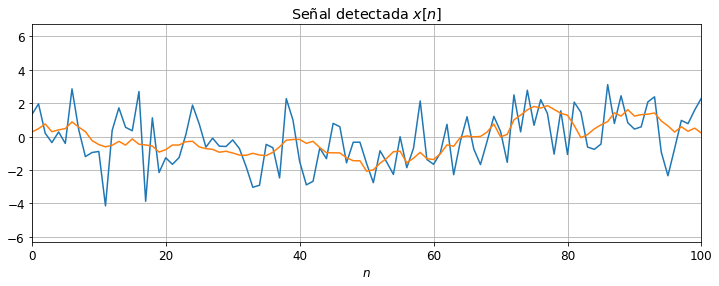

In [2]:
# Wiener filter - Denoising
N = 1000

# Señal deseada - Proceso Autoregresivo orden 1: d[n] = alpha * d[n-1] + b*g[n]
# g[n] es una variable gaussiana con media 0 y varianza 1
alpha = 0.95
b = [np.sqrt(1-alpha**2)]
d = signal.lfilter(b,[1,-alpha],np.random.randn(N))

# Ruido blanco
sigw = np.sqrt(2)
w = sigw*np.random.randn(N)

# Señal observada x[n] = d[n] + w[n]
x = d + w

plt.figure(figsize=[12,4])
plt.plot(x)
plt.plot(d)
plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal detectada $x[n]$')


Error medio cuadrático:  0.31097142535554795
Error medio cuadrático (ideal):  0.33265704134738094


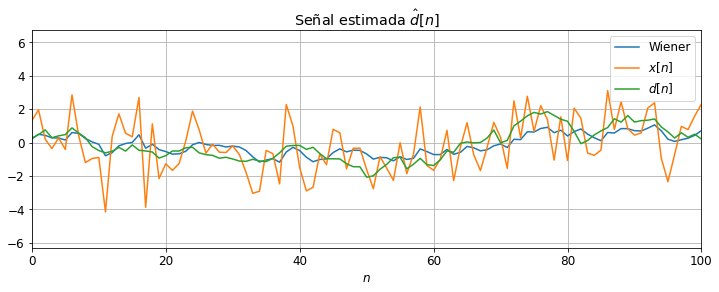

In [3]:
# Wiener Filter

P = 11

# Matriz Rx = Rd + Rw
Rd = np.zeros((P,P))
for i in range(P):
    for j in range(P):
        Rd[i,j] = alpha**np.abs(i-j)
Rw = sigw**2 * np.eye(P)
Rx = Rd + Rw

# Vector rdx = rd
rdx = alpha**np.arange(P)

# Calculando Filtro Wiener
H = np.dot(np.linalg.inv(Rx),rdx)
dH = signal.lfilter(H,[1],x)

plt.figure(figsize=[12,4])
plt.plot(dH)
plt.plot(x)
plt.plot(d)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener','$x[n]$','$d[n]$'])

# Calculando algunos parámetros
print('Error medio cuadrático: ',np.mean((d-dH)**2))
print('Error medio cuadrático (ideal): ',rdx[0] - np.dot(H,rdx))

Error medio cuadrático:  0.33262829430701696


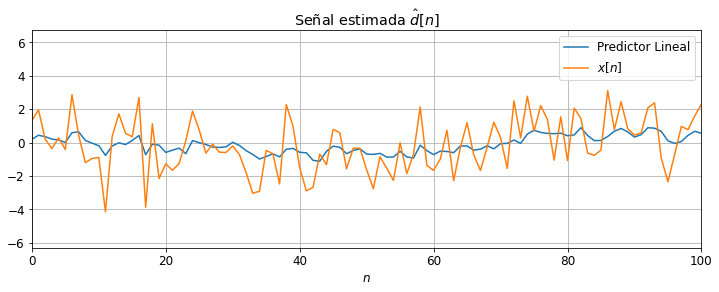

In [4]:
# Utilizando los datos para calcular las correlaciones

# Matriz Rx = Rd + Rw
rx = np.zeros(P)
for k in range(P):
    rx[k] = np.mean(x[0:N-k]*x[k:N])
    
Rx = np.zeros((P,P))
for i in range(P):
    for j in range(P):
        Rx[i,j] = rx[np.abs(i-j)]

# Vector rdx = rd
rdx = np.zeros(P)
for k in range(P):
    rdx[k] = np.mean(x[0:N-(k+1)]*x[(k+1):N])
#    rdx[k] = np.mean(x[0:N-(k)]*x[(k):N])

# Calculando Filtro Wiener
H1 = np.dot(np.linalg.inv(Rx),rdx)
dH1 = signal.lfilter(H1,[1],x)

plt.figure(figsize=[12,4])
plt.plot(dH1)
plt.plot(x)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Predictor Lineal','$x[n]$'])

print('Error medio cuadrático: ',np.mean((d-dH1)**2))


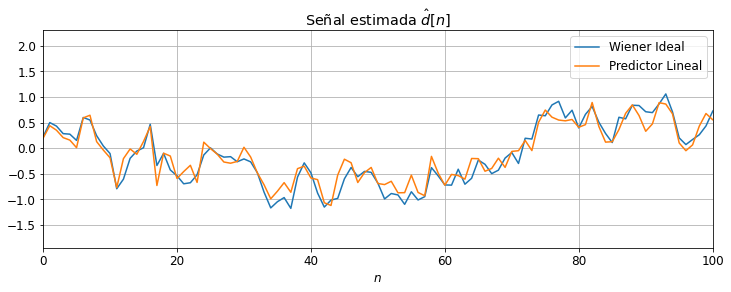

In [5]:
# Comparando Wiener ideal vs. Predicción Lineal usando datos

plt.figure(figsize=[12,4])
plt.plot(dH)
plt.plot(dH1)
#plt.plot(d)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener Ideal','Predictor Lineal'])


Error medio cuadrático:  0.3773566349940393


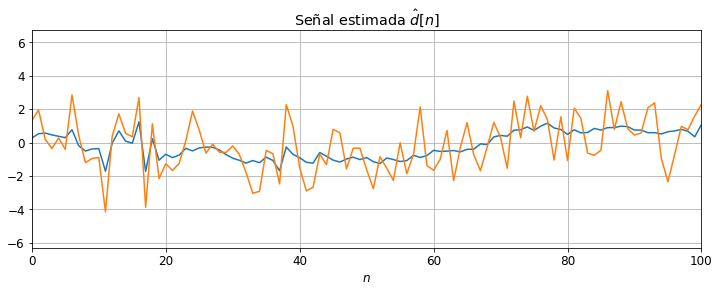

In [6]:
# Comparando con la función signal.wiener
dH2 = signal.wiener(x,mysize=P)

plt.figure(figsize=[12,4])
plt.plot(dH2)
plt.plot(x)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')

print('Error medio cuadrático: ',np.mean((d-dH2)**2))


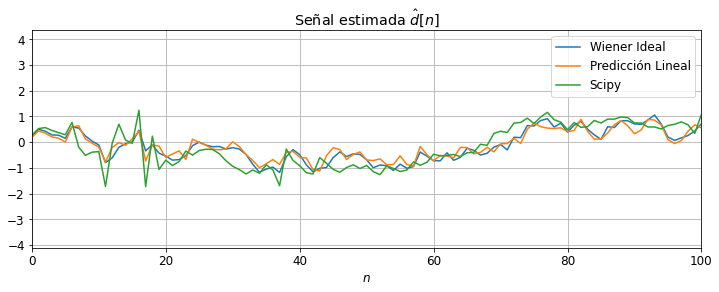

In [7]:
plt.figure(figsize=[12,4])
plt.plot(dH)
plt.plot(dH1)
plt.plot(dH2)
#plt.plot(d)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener Ideal','Predicción Lineal','Scipy'])
